In [1]:
%run twisted_graphene.py

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
g0=TwistedBilayerGraphene(1,0)
b1=g0.G1
b2=g0.G2

In [4]:
g=TwistedBilayerGraphene(1,1)
b1t=rot(g.theta)@g.G1
b2t=rot(g.theta)@g.G2

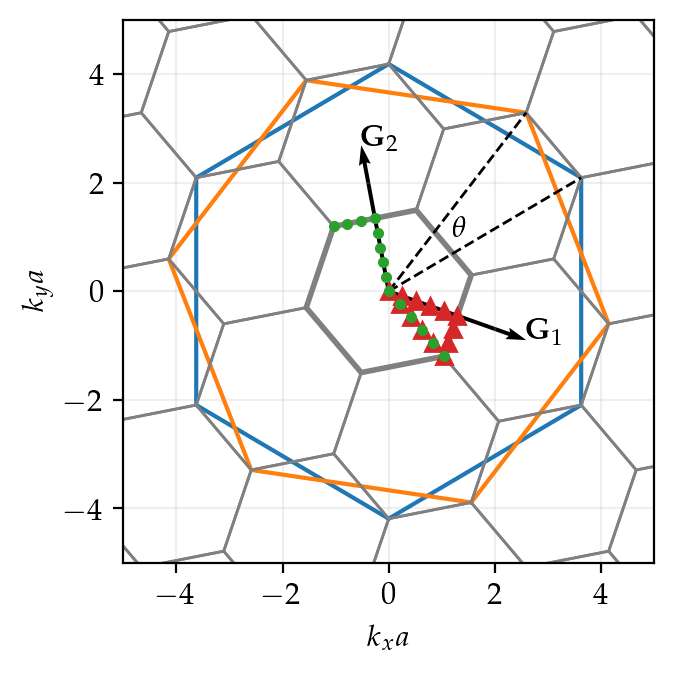

In [5]:
a=2.46

height=3.5
ratio=1.0
width=ratio*height

plt.figure(figsize=(width,height))

#borda da zona de brillouin: camada 1
vertices=np.array([g0.K[0],g0.Kp[0],g0.K[1],g0.Kp[1],g0.K[2],g0.Kp[2],g0.K[0]])
x=vertices[:,0]
y=vertices[:,1]
plt.plot(x*a,y*a,lw=1.5,color='tab:blue',label='first layer')

#borda da zona de brillouin: camada 2 (rotacionada)
vertices=np.array([rot(g.theta)@p for p in [g0.K[0],g0.Kp[0],g0.K[1],g0.Kp[1],g0.K[2],g0.Kp[2],g0.K[0]]])
x=vertices[:,0]
y=vertices[:,1]
plt.plot(x*a,y*a,lw=1.5,color='tab:orange',label='second layer (rotated)')

#borda da zona de brillouin: twisted
vertices=np.array([g.K[0],g.Kp[0],g.K[1],g.Kp[1],g.K[2],g.Kp[2],g.K[0]])
for m in range(-4,5):
    for n in range(-4,5):
        ver=vertices+m*g.G1+n*g.G2
        x=ver[:,0]
        y=ver[:,1]
        if m==n==0:
            plt.plot(x*a,y*a,lw=2.0,color='gray',label='twisted bilayer')
        else:
            plt.plot(x*a,y*a,lw=1.0,color='gray')

#vetores primitivos: twisted
origin=np.zeros(3)
x0=origin[0]
y0=origin[1]
vectors=np.array([[x0,y0,g.G1[0],g.G1[1]],[x0,y0,g.G2[0],g.G2[1]]])*a #[xi,yi,xf,yf]
X,Y,U,V=zip(*vectors)
plt.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=1, color=['black', 'black'])
plt.annotate('$\\mathbf{G}_1$',(g.G1[0]*a,g.G1[1]*a))
plt.annotate('$\\mathbf{G}_2$',(g.G2[0]*a,g.G2[1]*a))

#theta
vertices=np.array([np.zeros(3),g0.K[1]])
x=vertices[:,0]
y=vertices[:,1]
plt.plot(x*a,y*a,'k--',lw=1)
vertices=np.array([np.zeros(3),rot(g.theta)@g0.K[1]])
x=vertices[:,0]
y=vertices[:,1]
plt.plot(x*a,y*a,'k--',lw=1)
plt.annotate('$\\theta$',(1.2,1.0))

#caminho ΓMKΓ
g.set_kpath(g.path_GMKG,[5,3,5])
x=g.gamma[:,0]
y=g.gamma[:,1]
plt.plot(x*a,y*a,'^',color='tab:red',label='$\mathbf{\\Gamma}$-$\mathbf{M}$-$\mathbf{K}$-$\mathbf{\\Gamma}$ path')

#caminho KGMKp
g.set_kpath(g.path_KGMKp,[5,5,4],endpoint=True)
x=g.gamma[:,0]
y=g.gamma[:,1]
plt.plot(x*a,y*a,'.',color='tab:green',label="$\mathbf{K}$-$\mathbf{\\Gamma}$-$\mathbf{M}$-$\mathbf{K}'$ path")

ymax=5.0
xmax=ratio*ymax
plt.xlim((-xmax,xmax))
plt.ylim((-ymax,ymax))

plt.xlabel('$k_x a$')
plt.ylabel('$k_y a$')

plt.grid(True,alpha=0.2)

# plt.legend(frameon=False,fontsize=8,bbox_to_anchor=(1.0,0.5))

plt.savefig('Fig06_graphene_twisted_brillouin_zone.svg')

plt.show()